+ **Directory of this workbook**:

	pwd = /eos/home-f/franzoni/SWAN_projects/ML-A-Z-Hands-On-Python-R/Machine_Learning_A-Z_Template_Folder/Part_4_-_Clustering/Section_24_-_K-Means_Clustering



  + **Full path of the data file**:

	data_path = /eos/home-f/franzoni/SWAN_projects/ML-A-Z-Hands-On-Python-R/Machine_Learning_A-Z_Template_Folder/Part_4_-_Clustering/Section_24_-_K-Means_Clustering/K_Means/Mall_Customers.csv
('For n_clusters =', 2, 'The average silhouette_score is :', 0.42620850066216065)
('For n_clusters =', 3, 'The average silhouette_score is :', 0.4254725038202792)
('For n_clusters =', 4, 'The average silhouette_score is :', 0.43295184273333076)
('For n_clusters =', 5, 'The average silhouette_score is :', 0.4016436644787277)
('For n_clusters =', 6, 'The average silhouette_score is :', 0.39293552436103246)
('For n_clusters =', 7, 'The average silhouette_score is :', 0.3840192204022327)
('For n_clusters =', 8, 'The average silhouette_score is :', 0.3945566831270063)
('For n_clusters =', 9, 'The average silhouette_score is :', 0.39671440470358477)
('For n_clusters =', 10, 'The average silhouette_score is :', 0.4033148225471917)


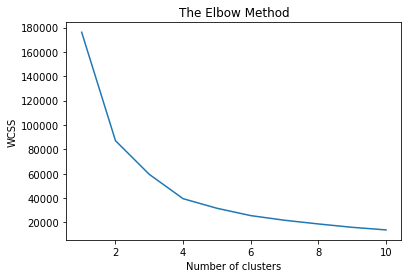

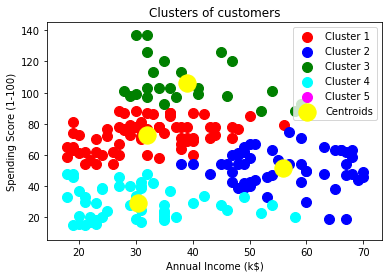

In [12]:
# K-Means Clustering

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

import sys, os
pwd = os.getcwd()

printmd('+ **Directory of this workbook**:')
print '\tpwd =', pwd

data_path = pwd+'/K_Means/Mall_Customers.csv'
printmd('\n  + **Full path of the data file**:')
print '\tdata_path =', data_path

# Importing the dataset
dataset = pd.read_csv(data_path)
X = dataset.iloc[:, [2, 3]].values
#y = dataset.iloc[:, 4].values

dataset.head(10)


# Splitting the dataset into the Training set and Test set
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    clusters = kmeans.predict(X)
    if i>1:
        silhouette_avg = silhouette_score(X, clusters)
        print("For n_clusters =", i, "The average silhouette_score is :", silhouette_avg)

    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [13]:
#X